In [2]:
# Hamza Shahid
# Netid: Hshahi2
# Joshua Herman
# Netid: jherma20
# Muhammad Abdullah Umar
# Netid: mumar4
# Final Project - Diabetes Analysis

In [3]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import Imputer
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.ensemble import RandomForestClassifier

In [4]:
# load the dataset using pandas.read_csv
DIABETES_DATA = pd.read_csv('diabetes.csv')

In [5]:
# display the dataset
DIABETES_DATA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# dealing with missing values 
imputerBloodPressure=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BloodPressure"]=imputerBloodPressure.fit_transform(DIABETES_DATA[["BloodPressure"]]).ravel()

imputerSkinThickness=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["SkinThickness"]=imputerSkinThickness.fit_transform(DIABETES_DATA[["SkinThickness"]]).ravel()

imputerBMI=Imputer(missing_values=0, strategy="mean" )


DIABETES_DATA["BMI"]=imputerBMI.fit_transform(DIABETES_DATA[["BMI"]]).ravel()

DIABETES_DATA

imputerInsulin=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["Insulin"]=imputerInsulin.fit_transform(DIABETES_DATA[["Insulin"]]).ravel()

imputerGlucose=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["Glucose"]=imputerGlucose.fit_transform(DIABETES_DATA[["Glucose"]]).ravel()

In [126]:

#-------------------------------------------------------------
# Exploratory Data Analysis 
# Explore the data using summary statistics and plots and
# identify the most important variables for data analysis
DIABETES_POSITIVE = DIABETES_DATA['Outcome'] == 1
DIABETES_NEGATIVE = DIABETES_DATA['Outcome'] == 0
DIABETES_POSITIVE.describe()
#DIABETES_NEGATIVE.describe()

count       768
unique        2
top       False
freq        500
Name: Outcome, dtype: object

In [8]:
DPInsulinMean = DIABETES_DATA.loc[DIABETES_POSITIVE, 'Insulin']
DPInsulinMean.describe()

count    268.000000
mean     180.431548
std       95.747538
min       14.000000
25%      155.548223
50%      155.548223
75%      167.250000
max      846.000000
Name: Insulin, dtype: float64

In [9]:
DNInsulinMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Insulin']
DNInsulinMean.describe()

count    500.000000
mean     142.210761
std       75.463785
min       15.000000
25%       95.000000
50%      155.548223
75%      155.548223
max      744.000000
Name: Insulin, dtype: float64

In [10]:
DPBMIMean= DIABETES_DATA.loc[DIABETES_POSITIVE, 'BMI']
DPBMIMean.describe()

count    268.000000
mean      35.384757
std        6.595065
min       22.900000
25%       30.900000
50%       34.250000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64

In [11]:
DNBMIMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'BMI']
DNBMIMean.describe()

count    500.000000
mean      30.888434
std        6.504779
min       18.200000
25%       25.750000
50%       30.400000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

In [12]:
DPDPFMean= DIABETES_DATA.loc[DIABETES_POSITIVE, 'DiabetesPedigreeFunction']
DPDPFMean.describe()


count    268.000000
mean       0.550500
std        0.372354
min        0.088000
25%        0.262500
50%        0.449000
75%        0.728000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [13]:
DNDPFMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'DiabetesPedigreeFunction']
DNDPFMean.describe()

count    500.000000
mean       0.429734
std        0.299085
min        0.078000
25%        0.229750
50%        0.336000
75%        0.561750
max        2.329000
Name: DiabetesPedigreeFunction, dtype: float64

In [14]:
DPAgeMean= DIABETES_DATA.loc[DIABETES_POSITIVE, 'Age']
DPAgeMean.describe()

count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64

In [15]:
DNAgeMean= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Age']
DNAgeMean.describe()

count    500.000000
mean      31.190000
std       11.667655
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64

In [16]:
# Exploratory Data Analysis 
DPPreg= DIABETES_DATA.loc[DIABETES_POSITIVE, 'Pregnancies']
DPPregMean = DPPreg.mean()
DPPreg.describe()


count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [17]:
# Exploratory Data Analysis 
DNPreg= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Pregnancies']
DNPregMean = DNPreg.mean()
DNPreg.describe()

count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [18]:
# Exploratory Data Analysis 
DPGlucose= DIABETES_DATA.loc[DIABETES_POSITIVE, 'Glucose']
DPGlucoseMean = DPGlucose.mean()
DPGlucose.describe()

count    268.000000
mean     142.165573
std       29.541750
min       78.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

In [19]:
# Exploratory Data Analysis 
DNGlucose = DIABETES_DATA.loc[DIABETES_NEGATIVE, 'Glucose']
DNGlucoseMean = DNGlucose.mean()
DNGlucose.describe()

count    500.000000
mean     110.710121
std       24.717060
min       44.000000
25%       93.000000
50%      107.500000
75%      125.000000
max      197.000000
Name: Glucose, dtype: float64

In [20]:
# Exploratory Data Analysis 
DPBloodPressure= DIABETES_DATA.loc[DIABETES_POSITIVE, 'BloodPressure']
DPBloodPressureMean = DPBloodPressure.mean()
DPBloodPressure.describe()

count    268.000000
mean      75.147324
std       11.945712
min       30.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

In [21]:
# Exploratory Data Analysis 
DNBloodPressure= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'BloodPressure']
DNBloodPressureMean = DNBloodPressure.mean()
DNBloodPressure.describe()

count    500.000000
mean      70.935397
std       11.931033
min       24.000000
25%       63.500000
50%       72.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [22]:
# Exploratory Data Analysis 
DPSkinThickness= DIABETES_DATA.loc[DIABETES_POSITIVE, 'SkinThickness']
DPSkinThicknessMean = DPSkinThickness.mean()
DPSkinThickness.describe()

count    268.000000
mean      31.736944
std        8.647599
min        7.000000
25%       29.153420
50%       29.153420
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [23]:
# Exploratory Data Analysis 
DNSkinThickness= DIABETES_DATA.loc[DIABETES_NEGATIVE, 'SkinThickness']
DNSkinThicknessMean = DNSkinThickness.mean()
DNSkinThickness.describe()

count    500.000000
mean      27.768651
std        8.559606
min        7.000000
25%       22.000000
50%       29.153420
75%       31.000000
max       60.000000
Name: SkinThickness, dtype: float64

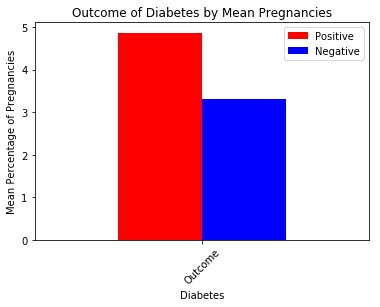

In [24]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[4.866],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[3.298]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Pregnancies', ylabel= 'Mean Percentage of Pregnancies')
ax.legend(["Positive", "Negative"]);


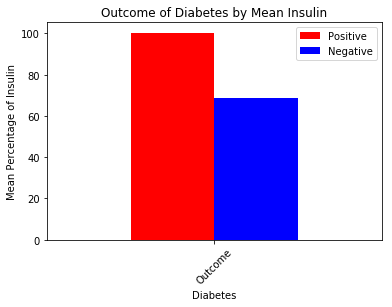

In [25]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[100.33582089552239],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[68.792]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Insulin', ylabel= 'Mean Percentage of Insulin')
ax.legend(["Positive", "Negative"]);

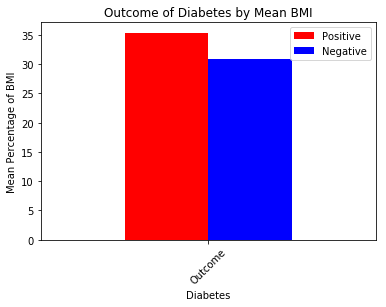

In [26]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[35.38475719158496],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[30.888434346103004]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean BMI', ylabel= 'Mean Percentage of BMI')
ax.legend(["Positive", "Negative"]);

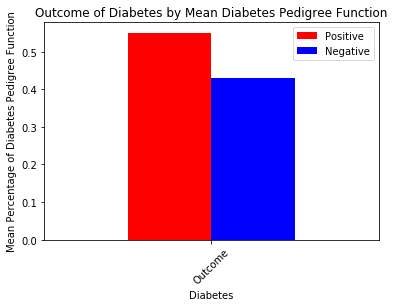

In [27]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[0.5505],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[0.42973400000000017]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Diabetes Pedigree Function', ylabel= 'Mean Percentage of Diabetes Pedigree Function')
ax.legend(["Positive", "Negative"]);

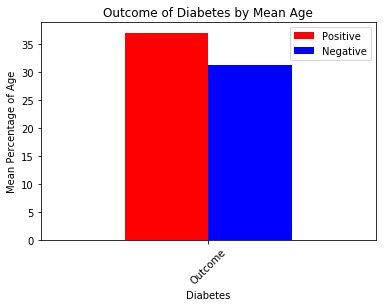

In [28]:
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[37.06716417910448],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[31.19]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Age', ylabel= 'Mean Percentage of Age')
ax.legend(["Positive", "Negative"]);

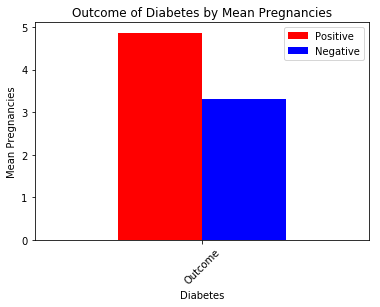

In [29]:
# Pregnancies 
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[4.866],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[3.298]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Pregnancies', ylabel= 'Mean Pregnancies')
ax.legend(["Positive", "Negative"]);

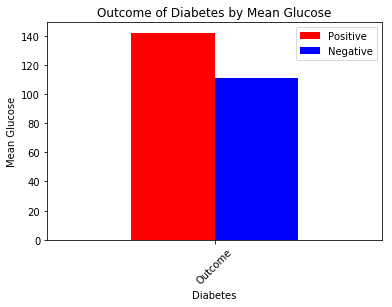

In [30]:
# Glucose 
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[DPGlucoseMean],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[DNGlucoseMean]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Glucose', ylabel= 'Mean Glucose')
ax.legend(["Positive", "Negative"]);

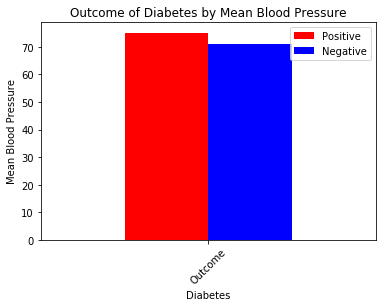

In [31]:
# BP
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[DPBloodPressureMean],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[DNBloodPressureMean]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean Blood Pressure', ylabel= 'Mean Blood Pressure')
ax.legend(["Positive", "Negative"]);

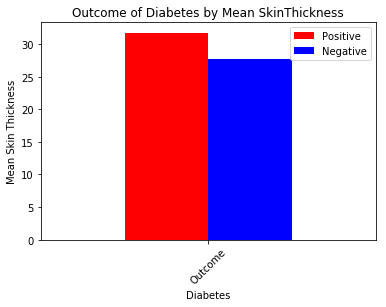

In [32]:
# ST
df = pd.DataFrame({"date_x":[2015]*1,
                   "Occurance_x":[DPSkinThicknessMean],
                   "Diabetes":["Outcome"],
                   "date_y":[2016]*1,
                   "Occurance_y":[DNSkinThicknessMean]})

ax = df[["Diabetes","Occurance_x", "Occurance_y"]].plot(x='Diabetes',
                                                      kind='bar', 
                                                      color=["r","b"],
                                                      rot=45)
ax.set(title = 'Outcome of Diabetes by Mean SkinThickness', ylabel= 'Mean Skin Thickness')
ax.legend(["Positive", "Negative"]);

In [33]:
#Age hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPAgeMean,DNAgeMean, equal_var=False)

Ttest_indResult(statistic=6.92073837898804, pvalue=1.2015125273113395e-11)

In [34]:
#Insulin hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPInsulinMean, DNInsulinMean, equal_var=False)

Ttest_indResult(statistic=5.660196485019534, pvalue=2.703605840633403e-08)

In [35]:
#BMI hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPBMIMean, DNBMIMean, equal_var = False)

Ttest_indResult(statistic=9.048582105578078, pvalue=2.6168665306875313e-18)

In [36]:
#DPF hypothesis test
#H0 = M1 <= M2
#HA = M1 > M2 
stats.ttest_ind(DPDPFMean, DNDPFMean, equal_var = False)

Ttest_indResult(statistic=4.576812008291278, pvalue=6.100481424240326e-06)

In [37]:
# Hypothesis test for pregnancies and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2

stats.ttest_ind(DPPreg, DNPreg, equal_var = False)


Ttest_indResult(statistic=5.9069614794974905, pvalue=6.821925600457145e-09)

In [38]:
# Hypothesis test for Blood Pressure and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
stats.ttest_ind(DPBloodPressure, DNBloodPressure, equal_var = False)

Ttest_indResult(statistic=4.659365773434451, pvalue=3.990682990682639e-06)

In [39]:
# Hypothesis test for Glucose and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
stats.ttest_ind(DPGlucose, DNGlucose, equal_var = False)

Ttest_indResult(statistic=14.86418210895796, pvalue=3.0991261541664715e-41)

In [40]:
# Hypothesis test for Skin Thickness and diabetes (1 = +, 2= -)
# H0 = m1 <= m2
# Ha = m1 > m2
stats.ttest_ind(DPSkinThickness, DNSkinThickness, equal_var = False)

Ttest_indResult(statistic=6.08302590652634, pvalue=2.2316137489413956e-09)

In [41]:
#
# Blood pressure linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     34.82
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           5.43e-09
Time:                        23:32:09   Log-Likelihood:                -2986.7
No. Observations:                 768   AIC:                             5977.
Df Residuals:                     766   BIC:                             5987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.5269      0.648    107.232      

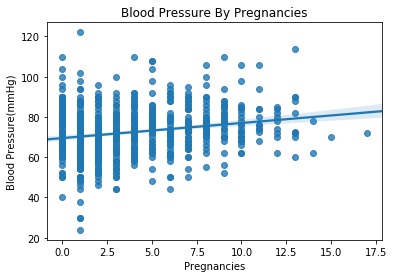

In [42]:
# plot blood pressure vs pregnancies
axis=sns.regplot(DIABETES_DATA['Pregnancies'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Pregnancies', xlabel='Pregnancies', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.35
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           9.62e-10
Time:                        23:32:10   Log-Likelihood:                -2985.0
No. Observations:                 768   AIC:                             5974.
Df Residuals:                     766   BIC:                             5983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.8444      1.758     35.185      0.0

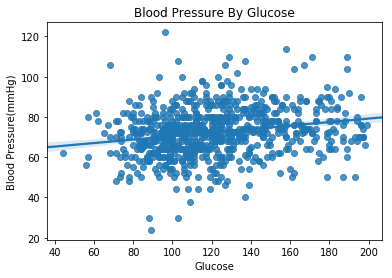

In [43]:
# plot blood pressure vs glucose
axis=sns.regplot(DIABETES_DATA['Glucose'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Glucose', xlabel='Glucose', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     29.58
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           7.23e-08
Time:                        23:32:10   Log-Likelihood:                -2989.2
No. Observations:                 768   AIC:                             5982.
Df Residuals:                     766   BIC:                             5992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        64.6703      1.485     43.538

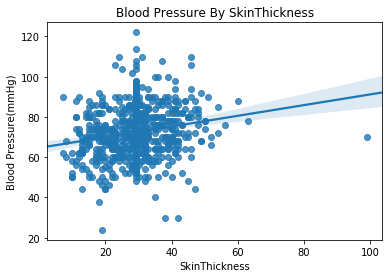

In [44]:
# plot blood pressure vs skin thickness
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By SkinThickness', xlabel='SkinThickness', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.049
Date:                Thu, 06 Dec 2018   Prob (F-statistic):             0.0445
Time:                        23:32:11   Log-Likelihood:                -3001.8
No. Observations:                 768   AIC:                             6008.
Df Residuals:                     766   BIC:                             6017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.8003      0.909     77.912      0.0

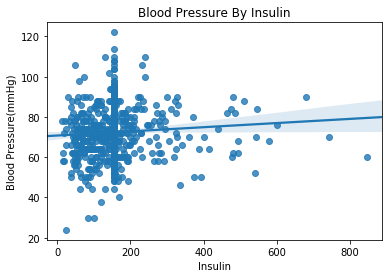

In [45]:
# plot blood pressure vs insulin
axis=sns.regplot(DIABETES_DATA['Insulin'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Insulin', xlabel='Insulin', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     65.81
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.97e-15
Time:                        23:32:11   Log-Likelihood:                -2972.1
No. Observations:                 768   AIC:                             5948.
Df Residuals:                     766   BIC:                             5958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3429      2.024     27.838      0.0

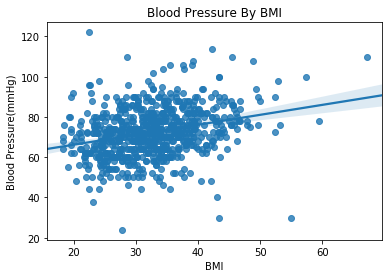

In [46]:
# plot blood pressure vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By BMI', xlabel='BMI', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.005849
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.939
Time:                        23:32:12   Log-Likelihood:                -3003.8
No. Observations:                 768   AIC:                             6012.
Df Residuals:                     766   BIC:                             6021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

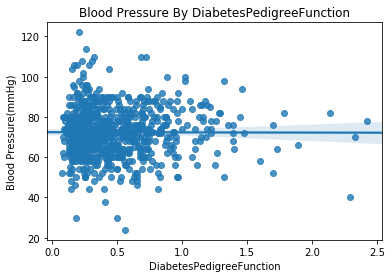

In [47]:
# plot blood pressure vs diabetes pedigree function
axis=sns.regplot(DIABETES_DATA['DiabetesPedigreeFunction'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By DiabetesPedigreeFunction', xlabel='DiabetesPedigreeFunction', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     90.21
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.66e-20
Time:                        23:32:12   Log-Likelihood:                -2961.0
No. Observations:                 768   AIC:                             5926.
Df Residuals:                     766   BIC:                             5935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.3070      1.239     49.467      0.0

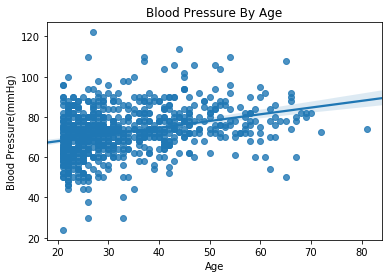

In [48]:
# plot blood pressure vs age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Age', xlabel='Age', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

In [49]:
#
# blood pressure multiple regression relationship
#

In [50]:
# blood pressure vs age + BMI + glucose
model=smf.ols(formula='BloodPressure ~ Age+BMI+Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     58.04
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           8.30e-34
Time:                        23:32:13   Log-Likelihood:                -2925.0
No. Observations:                 768   AIC:                             5858.
Df Residuals:                     764   BIC:                             5876.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8050      2.374     18.452      0.0

In [51]:
#
# glucose linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     29.63
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           7.03e-08
Time:                        23:32:13   Log-Likelihood:                -3697.9
No. Observations:                 768   AIC:                             7400.
Df Residuals:                     766   BIC:                             7409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       102.2072      3.737     27.348

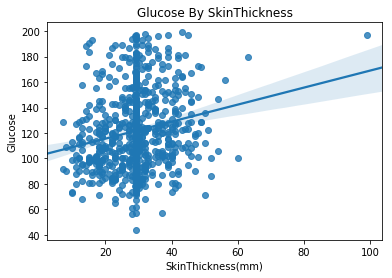

In [52]:
# plot Glucose vs Skin Thickness
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By SkinThickness', xlabel='SkinThickness(mm)', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     43.16
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           9.33e-11
Time:                        23:32:14   Log-Likelihood:                -3691.4
No. Observations:                 768   AIC:                             7387.
Df Residuals:                     766   BIC:                             7396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.5034      5.163     17.141      0.0

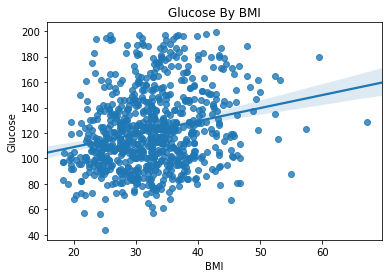

In [53]:
# plot Glucose vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By BMI', xlabel='BMI', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     58.58
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           5.88e-14
Time:                        23:32:15   Log-Likelihood:                -3684.1
No. Observations:                 768   AIC:                             7372.
Df Residuals:                     766   BIC:                             7382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.7572      3.178     31.079      0.0

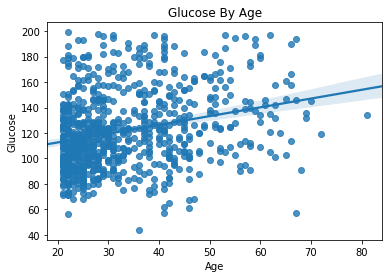

In [54]:
# plot Glucose vs Age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Age', xlabel='Age', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     12.74
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           0.000380
Time:                        23:32:15   Log-Likelihood:                -3706.1
No. Observations:                 768   AIC:                             7416.
Df Residuals:                     766   BIC:                             7426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     117.2443      1.654     70.870      

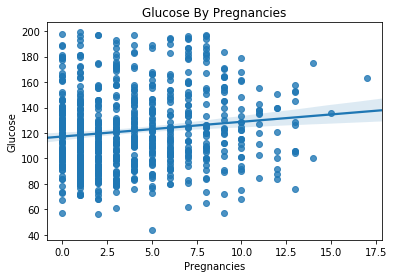

In [55]:
# plot Glucose vs Pregnancies
axis=sns.regplot(DIABETES_DATA['Pregnancies'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Pregnancies', xlabel='Pregnancies', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     164.2
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           3.36e-34
Time:                        23:32:16   Log-Likelihood:                -3637.9
No. Observations:                 768   AIC:                             7280.
Df Residuals:                     766   BIC:                             7289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.2910      2.080     47.248      0.0

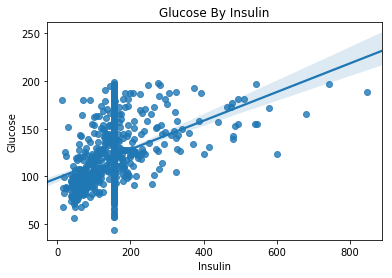

In [56]:
# plot Glucose vs Insulin
axis=sns.regplot(DIABETES_DATA['Insulin'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By Insulin', xlabel='Insulin', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     14.67
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           0.000139
Time:                        23:32:16   Log-Likelihood:                -3705.2
No. Observations:                 768   AIC:                             7414.
Df Residuals:                     766   BIC:                             7424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

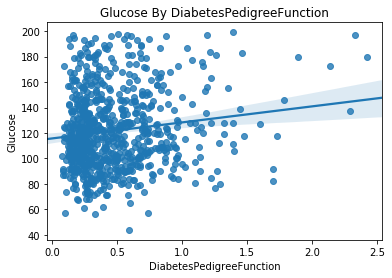

In [57]:
# plot Glucose vs DiabetesPedigreeFunction
axis=sns.regplot(DIABETES_DATA['DiabetesPedigreeFunction'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By DiabetesPedigreeFunction', xlabel='DiabetesPedigreeFunction', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     38.35
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           9.62e-10
Time:                        23:32:17   Log-Likelihood:                -3693.7
No. Observations:                 768   AIC:                             7391.
Df Residuals:                     766   BIC:                             7401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        81.9045      6.513     12.576

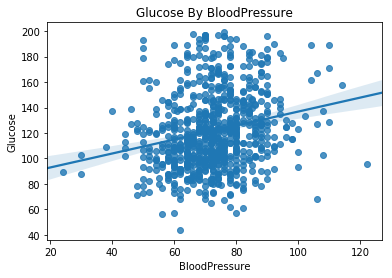

In [58]:
# plot Glucose vs BloodPressure
axis=sns.regplot(DIABETES_DATA['BloodPressure'],DIABETES_DATA['Glucose'])
axis.set(title='Glucose By BloodPressure', xlabel='BloodPressure', ylabel='Glucose')


model=smf.ols(formula='Glucose ~ BloodPressure', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

In [59]:
#
# glucose multiple regression relationship
#

In [60]:
# glucose vs BMI + Age + Insulin
model=smf.ols(formula='Glucose ~ BMI + Age + Insulin + BloodPressure', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     65.18
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.94e-47
Time:                        23:32:17   Log-Likelihood:                -3599.6
No. Observations:                 768   AIC:                             7209.
Df Residuals:                     763   BIC:                             7232.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.6144      6.646      7.315

In [61]:
#
# BMI linear regression relationships
#

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     43.16
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           9.33e-11
Time:                        23:32:18   Log-Likelihood:                -2548.8
No. Observations:                 768   AIC:                             5102.
Df Residuals:                     766   BIC:                             5111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1094      0.996     26.213      0.0

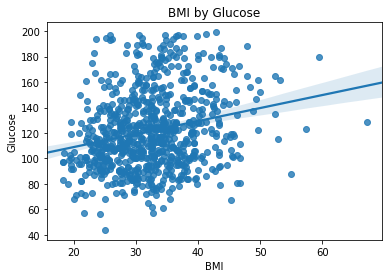

In [62]:
# plot BMI vs Glucose
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Glucose'])
axis.set(title='BMI by Glucose', xlabel='BMI', ylabel='Glucose')


model=smf.ols(formula= 'BMI ~ Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     319.3
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           5.89e-60
Time:                        23:32:18   Log-Likelihood:                -2436.1
No. Observations:                 768   AIC:                             4876.
Df Residuals:                     766   BIC:                             4885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.0908      0.723     27.794

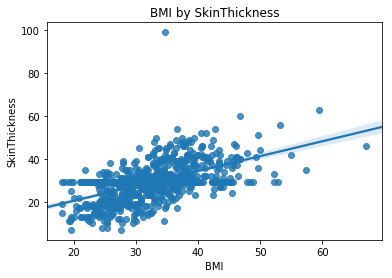

In [63]:
# plot BMI vs SkinThickness
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['SkinThickness'])
axis.set(title='BMI by SkinThickness', xlabel='BMI', ylabel='SkinThickness')


model=smf.ols(formula= 'BMI ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4992
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.480
Time:                        23:32:19   Log-Likelihood:                -2569.6
No. Observations:                 768   AIC:                             5143.
Df Residuals:                     766   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.9616      0.744     42.931      0.0

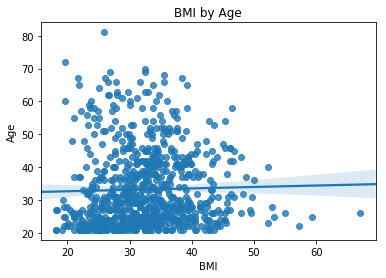

In [64]:
# plot BMI vs Age 
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Age'])
axis.set(title='BMI by Age', xlabel='BMI', ylabel='Age')


model=smf.ols(formula= 'BMI ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3564
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.551
Time:                        23:32:20   Log-Likelihood:                -2569.7
No. Observations:                 768   AIC:                             5143.
Df Residuals:                     766   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      32.2883      0.377     85.711      

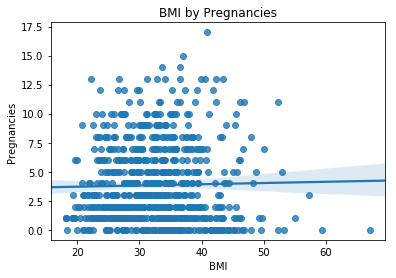

In [65]:
# plot BMI vs Pregnancies
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Pregnancies'])
axis.set(title='BMI by Pregnancies', xlabel='BMI', ylabel='Pregnancies')


model=smf.ols(formula= 'BMI ~ Pregnancies', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     21.86
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           3.46e-06
Time:                        23:32:20   Log-Likelihood:                -2559.1
No. Observations:                 768   AIC:                             5122.
Df Residuals:                     766   BIC:                             5131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.3621      0.511     59.462      0.0

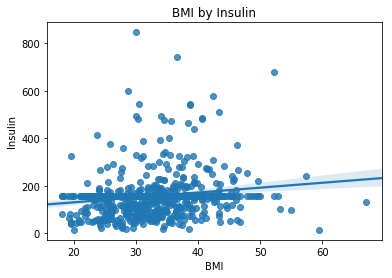

In [66]:
# plot BMI vs Glucose
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['Insulin'])
axis.set(title='BMI by Insulin', xlabel='BMI', ylabel='Insulin')


model=smf.ols(formula= 'BMI ~ Insulin', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     18.46
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.96e-05
Time:                        23:32:21   Log-Likelihood:                -2560.7
No. Observations:                 768   AIC:                             5125.
Df Residuals:                     766   BIC:                             5135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

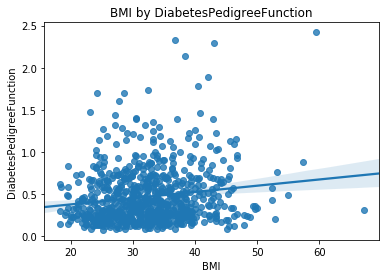

In [67]:
# plot BMI vs DBF
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['DiabetesPedigreeFunction'])
axis.set(title='BMI by DiabetesPedigreeFunction', xlabel='BMI', ylabel='DiabetesPedigreeFunction')


model=smf.ols(formula= 'BMI ~ DiabetesPedigreeFunction', data=DIABETES_DATA)
results=model.fit()
print(results.summary())



In [68]:
#
# BMI multiple regression relationship
#

In [69]:
# BMI vs SkinThickness + BloodPressure + Glucose
model=smf.ols(formula= 'BMI ~ BloodPressure + SkinThickness + Glucose', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     128.8
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.56e-67
Time:                        23:32:21   Log-Likelihood:                -2412.7
No. Observations:                 768   AIC:                             4833.
Df Residuals:                     764   BIC:                             4852.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.7258      1.399      8.381

[(  1,  98,  1,  1.23500000e+02, 0.94070582, 576, 576.)
 (  2,   7,  5,  2.64500008e+01, 0.68523614, 329, 329.)
 (  3,   6,  4,  4.85000000e+01, 0.09140162,  86,  86.)
 (  4,   5,  0,  2.50000000e+00, 0.54356444,   8,   8.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   7,   7.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  78,  78.)
 (  8,  47,  7,  2.85000000e+01, 0.79966296, 243, 243.)
 (  9,  18,  3,  2.90767097e+01, 0.53283506, 132, 132.)
 ( 10,  11,  5,  3.27000008e+01, 0.22228483,  56,  56.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  35,  35.)
 ( 12,  17,  6,  7.05999970e-01, 0.45371634,  21,  21.)
 ( 13,  16,  4,  3.80000000e+01, 0.28639696,  20,  20.)
 ( 14,  15,  4,  3.40000000e+01, 1.        ,   2,   2.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1,   1.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,  18,  18.)
 ( -1,  -1, -2, -2.00000000e+00, 0.        ,   1

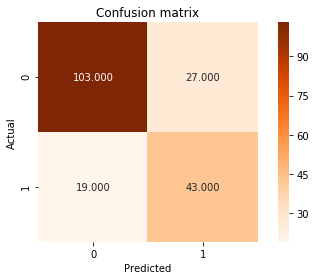

In [70]:
#---------------------------------------------------------
# CLASSIFICATION 
# Because we want to test whether a patient is diabetic or non-diabetic based on different features
# 1. Everything grouped together
# 2. Highest difference in means grouped together (preg, glucose, Insulin, BMI, DPF, Age)
# 3. Lowest p-values grouped together  (Glucose, BMI)
# 4. Highest R-Squared in multiple regression grouped together 
# (BMI ~ BloodPressure + SkinThickness + Glucose), (Glucose ~ BMI + Age + Insulin + BloodPressure)
# (BloodPressure ~ Age+BMI+Glucose)
# 5. Experimentations

# Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(DIABETES_DATA[['Pregnancies','Glucose',
                                                                   'BloodPressure','SkinThickness',
                                                                  'Insulin', 'BMI', 
                                                                   'DiabetesPedigreeFunction', 'Age']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)
#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#DECISION TREE CLASSIFIER FOR EVERY VARIABLE
classifier=DecisionTreeClassifier(criterion='entropy',random_state=10)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])

y_pred=classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [71]:
#Decision Trees(Evaluation Matrix) for every feature
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7604166666666666

Error
0.23958333333333337

Precision
[0.8442623  0.61428571]

Recall
[0.79230769 0.69354839]

F1_score
[0.81746032 0.65151515]


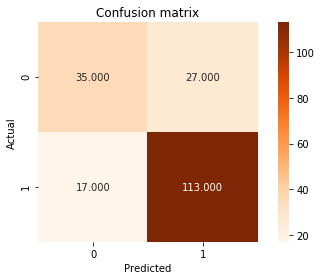

In [72]:
#NAIVE BAYES CLASSIFIER FOR EVERY VARIABLE
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels = [1,0])
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [73]:
# Naive Bayes metrics for every variable 
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7708333333333334

Error
0.22916666666666663

Precision
[0.80714286 0.67307692]

Recall
[0.86923077 0.56451613]

F1_score
[0.83703704 0.61403509]


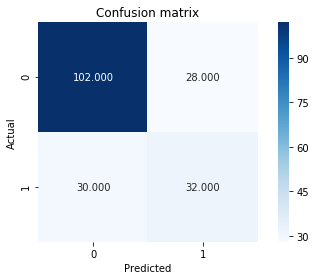

In [74]:
# CLASSIFIER: k-Nearest Neighbors fore every feature
# initialize k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(x_train, y_train)

# predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(x_test) 

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [75]:
# CLASSIFIER: k-Nearest Neighbors fore every feature
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.6979166666666666

Error
0.30208333333333337

Precision
[0.77272727 0.53333333]

Recall
[0.78461538 0.51612903]

F1_score
[0.77862595 0.52459016]


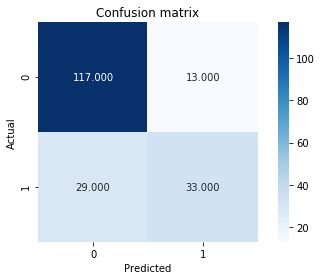

In [76]:
# CLASSIFIER: Linear SVM
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [77]:
# CLASSIFIER: Linear SVM for every feature
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.78125

Error
0.21875

Precision
[0.80136986 0.7173913 ]

Recall
[0.9        0.53225806]

F1_score
[0.84782609 0.61111111]


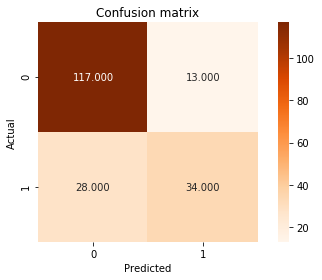

In [78]:
# Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(DIABETES_DATA[['Pregnancies','Glucose',
                                                                  'Insulin', 'BMI', 
                                                                   'DiabetesPedigreeFunction', 'Age']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)
#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#NAIVE BAYES CLASSIFIER FOR 'Pregnancies','Glucose','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' 
# Greates difference in meeans
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [79]:
#NAIVE BAYES CLASSIFIER FOR 'Pregnancies','Glucose','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' 
# Greates difference in meeans
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7864583333333334

Error
0.21354166666666663

Precision
[0.80689655 0.72340426]

Recall
[0.9       0.5483871]

F1_score
[0.85090909 0.62385321]


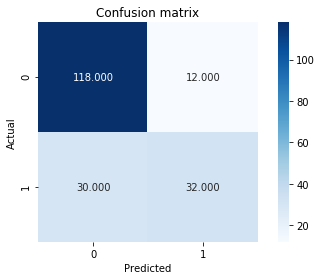

In [80]:
# CLASSIFIER: Linear SVM 
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [81]:
# CLASSIFIER: Linear SVM 
# BEST F1 SCORE*************************************
# BEST ACCURACY*************************************
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.78125

Error
0.21875

Precision
[0.7972973  0.72727273]

Recall
[0.90769231 0.51612903]

F1_score
[0.84892086 0.60377358]


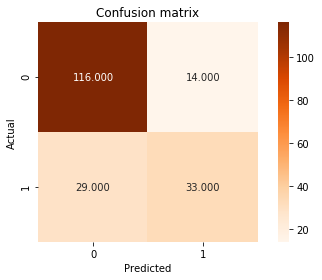

In [82]:
# Partition the dataset into a training set and a validation set using the holdout method or
# the cross-validation method. 
x_train, x_test, y_train, y_test = train_test_split(DIABETES_DATA[['Glucose','BMI']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)
#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#NAIVE BAYES CLASSIFIER FOR 'Glucose','BMI'
# For lowest P-values
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [83]:
#NAIVE BAYES CLASSIFIER FOR 'Glucose','BMI'
# For lowest P-values
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7760416666666666

Error
0.22395833333333337

Precision
[0.8        0.70212766]

Recall
[0.89230769 0.53225806]

F1_score
[0.84363636 0.60550459]


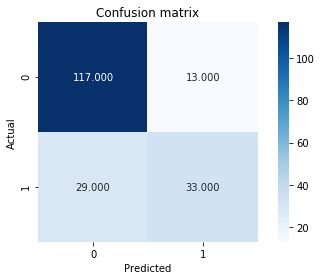

In [84]:
# CLASSIFIER: Linear SVM 
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [85]:
# CLASSIFIER: Linear SVM 
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.78125

Error
0.21875

Precision
[0.80136986 0.7173913 ]

Recall
[0.9        0.53225806]

F1_score
[0.84782609 0.61111111]


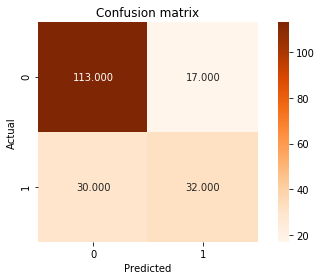

In [86]:
# CLASSIFICATION 
# 4. Highest R-Squared in multiple regression grouped together 
# (BMI ~ BloodPressure + SkinThickness + Glucose)
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['BMI','BloodPressure','SkinThickness','Glucose']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [87]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7552083333333334

Error
0.24479166666666663

Precision
[0.79020979 0.65306122]

Recall
[0.86923077 0.51612903]

F1_score
[0.82783883 0.57657658]


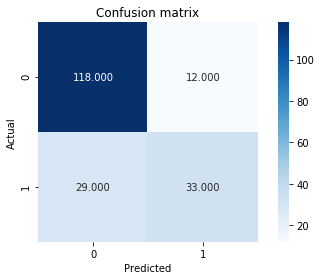

In [88]:
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [89]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7864583333333334

Error
0.21354166666666663

Precision
[0.80272109 0.73333333]

Recall
[0.90769231 0.53225806]

F1_score
[0.85198556 0.61682243]


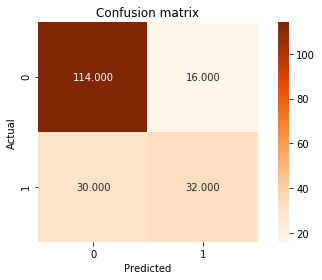

In [90]:
#(Glucose ~ BMI + Age + Insulin + BloodPressure)
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['BMI','BloodPressure','Insulin','Glucose','Age']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [91]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7604166666666666

Error
0.23958333333333337

Precision
[0.79166667 0.66666667]

Recall
[0.87692308 0.51612903]

F1_score
[0.83211679 0.58181818]


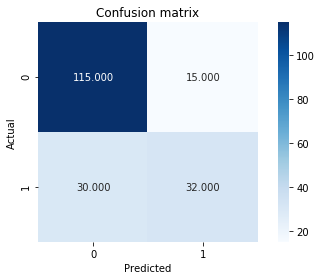

In [92]:
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [93]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.765625

Error
0.234375

Precision
[0.79310345 0.68085106]

Recall
[0.88461538 0.51612903]

F1_score
[0.83636364 0.58715596]


[(  1, 142,  3, 123.5       , 0.94070582, 576, 576.)
 (  2,   9,  0,  26.45000076, 0.68523614, 329, 329.)
 (  3,   4,  3, 106.5       , 0.09140162,  86,  86.)
 ( -1,  -1, -2,  -2.        , 0.        ,  63,  63.)
 (  5,   8,  3, 107.5       , 0.25801867,  23,  23.)
 (  6,   7,  0,  23.75      , 0.91829583,   3,   3.)
 ( -1,  -1, -2,  -2.        , 0.        ,   1,   1.)
 ( -1,  -1, -2,  -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2,  -2.        , 0.        ,  20,  20.)
 ( 10,  63,  2,  28.5       , 0.79966296, 243, 243.)
 ( 11,  16,  0,  30.95000076, 0.53283506, 132, 132.)
 ( 12,  13,  3, 118.5       , 0.17925607,  37,  37.)
 ( -1,  -1, -2,  -2.        , 0.        ,  34,  34.)
 ( 14,  15,  1,  80.        , 0.91829583,   3,   3.)
 ( -1,  -1, -2,  -2.        , 0.        ,   2,   2.)
 ( -1,  -1, -2,  -2.        , 0.        ,   1,   1.)
 ( 17,  22,  1,  53.        , 0.62924922,  95,  95.)
 ( 18,  21,  1,  49.        , 0.97095059,   5,   5.)
 ( 19,  20,  1,  39.        , 0.91829583,   3,

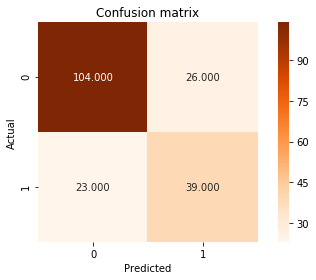

In [94]:
# (BloodPressure ~ Age+BMI+Glucose)
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['BMI','BloodPressure','Age','Glucose']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

classifier=DecisionTreeClassifier(criterion='entropy',random_state=10)
classifier.fit(x_train,y_train)

print(classifier.tree_.__getstate__()['nodes'])
len(classifier.tree_.__getstate__()['nodes'])


# TASK 7 CONTINUED - Decision Trees(Confusion Matrix)
y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [95]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)


Accuracy
0.7447916666666666

Error
0.25520833333333337

Precision
[0.81889764 0.6       ]

Recall
[0.8        0.62903226]

F1_score
[0.80933852 0.61417323]


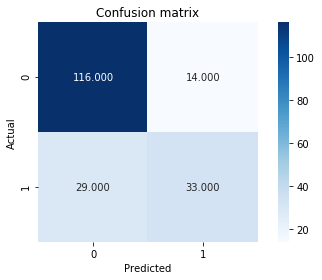

In [96]:
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


In [97]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7760416666666666

Error
0.22395833333333337

Precision
[0.8        0.70212766]

Recall
[0.89230769 0.53225806]

F1_score
[0.84363636 0.60550459]


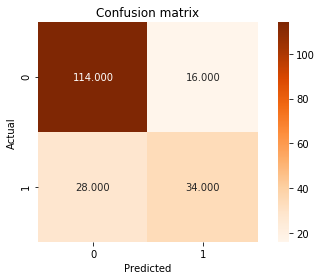

In [98]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [99]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7708333333333334

Error
0.22916666666666663

Precision
[0.8028169 0.68     ]

Recall
[0.87692308 0.5483871 ]

F1_score
[0.83823529 0.60714286]


In [100]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)

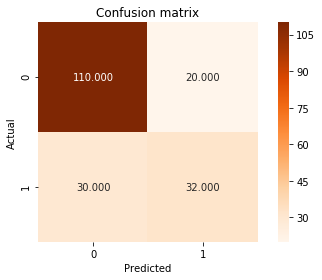

In [101]:
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Oranges)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [102]:
accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)

Accuracy
0.7395833333333334

Error
0.26041666666666663

Precision
[0.78571429 0.61538462]

Recall
[0.84615385 0.51612903]

F1_score
[0.81481481 0.56140351]


In [103]:
x_test.head()

,BMI,BloodPressure,Age,Glucose
661,42.9,76.0,22,199.0
122,33.6,74.0,23,107.0
113,34.0,62.0,25,76.0
14,25.8,72.0,51,166.0
529,24.6,65.0,31,111.0


Accuracy
0.7604166666666666

Error
0.23958333333333337

Precision
[0.78378378 0.68181818]

Recall
[0.89230769 0.48387097]

F1_score
[0.83453237 0.56603774]


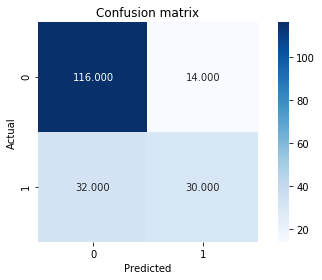

In [123]:
x_train,x_test,y_train,y_test=train_test_split(DIABETES_DATA[['Glucose']],DIABETES_DATA['Outcome'],test_size=0.25,random_state=0)

#Standardize the training set and the validation set.
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) 
# initialize linear SVM classifier
classifier = SVC(kernel = 'linear')  
classifier.fit(x_train, y_train)
x_test_scaled = scaler.transform(x_test)

# predict class labels using linear SVM classifier
y_pred = classifier.predict(x_test)

# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(y_test,y_pred)
error = 1-metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred,average=None) 
recall = metrics.recall_score(y_test,y_pred,average=None)
recall = metrics.recall_score(y_test,y_pred,average=None)
F1_score = metrics.f1_score(y_test,y_pred,average=None) 

print("Accuracy")
print (accuracy)
print()

print ("Error")
print(error)
print()

print("Precision")
print(precision)
print()

print("Recall")
print(recall)
print()

print("F1_score")
print(F1_score)